<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Ancho y Frecuencia Constantes </font> </center>

La discretización de variables continuas sirve para transformar valores numéricos continuos en categorías discretas o rangos, lo que facilita el análisis de datos y el entrenamiento de modelos de aprendizaje automático. Este proceso puede simplificar datos complejos, mejorar la interpretabilidad de modelos y, en algunos casos, optimizar el rendimiento de algoritmos que no manejan bien datos continuos.

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

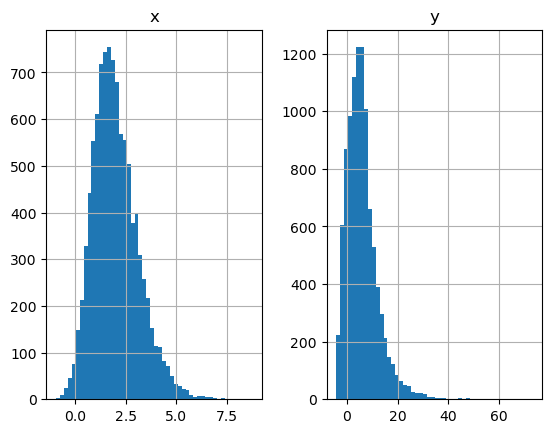

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

N=10**4
normal=np.random.normal(size=(N,1))
gamma=np.random.gamma(shape=4,size=(N,1))
x=0.5*normal+0.5*gamma
y=x**2+1+np.random.uniform(-5,5,(N,1))
df=pd.DataFrame(np.concatenate((x,y),axis=1),columns=('x','y'))
df.hist(bins=50)

<Axes: >

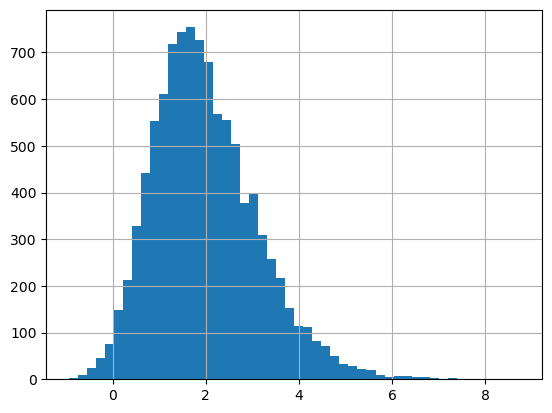

In [8]:
df.x.hist(bins=50)

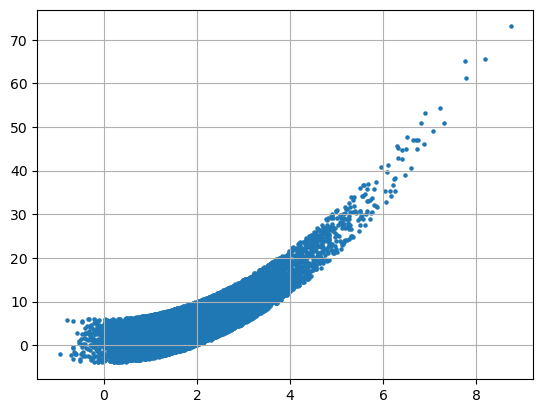

In [2]:
plt.scatter(df['x'],df['y'],s=5)
plt.grid()

In [3]:
#@title Discretización por ancho constante
bins=50
ancho=(df.x.max()-df.x.min())/bins
#intervalos=np.arange(df.x.min(),df.x.max()+ancho,ancho)
intervalos=np.linspace(df.x.min(),df.x.max(),bins+1)
ancho,intervalos

(0.19385828896012444,
 array([-0.94578804, -0.75192975, -0.55807146, -0.36421317, -0.17035489,
         0.0235034 ,  0.21736169,  0.41121998,  0.60507827,  0.79893656,
         0.99279485,  1.18665314,  1.38051143,  1.57436971,  1.768228  ,
         1.96208629,  2.15594458,  2.34980287,  2.54366116,  2.73751945,
         2.93137774,  3.12523603,  3.31909432,  3.5129526 ,  3.70681089,
         3.90066918,  4.09452747,  4.28838576,  4.48224405,  4.67610234,
         4.86996063,  5.06381892,  5.25767721,  5.45153549,  5.64539378,
         5.83925207,  6.03311036,  6.22696865,  6.42082694,  6.61468523,
         6.80854352,  7.00240181,  7.19626009,  7.39011838,  7.58397667,
         7.77783496,  7.97169325,  8.16555154,  8.35940983,  8.55326812,
         8.74712641]))

In [4]:
pd.cut?

Signature:
pd.cut(
    x,
    bins,
    right: 'bool' = True,
    labels=None,
    retbins: 'bool' = False,
    precision: 'int' = 3,
    include_lowest: 'bool' = False,
    duplicates: 'str' = 'raise',
    ordered: 'bool' = True,
)
Docstring:
Bin values into discrete intervals.

Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable. For example, `cut` could convert ages to groups of
age ranges. Supports binning into an equal number of bins, or a
pre-specified array of bins.

Parameters
----------
x : array-like
    The input array to be binned. Must be 1-dimensional.
bins : int, sequence of scalars, or IntervalIndex
    The criteria to bin by.

    * int : Defines the number of equal-width bins in the range of `x`. The
      range of `x` is extended by .1% on each side to include the minimum
      and maximum values of `x`.
    * sequence of scalars : Defines the bin edges allowing

In [5]:
# Discretización
#
# Se obtienen valores distribuidos a lo largo del rango de 'x' de forma que le asignamos la misma importancia
df['ancho_x']=pd.cut(df.x,intervalos,include_lowest=True)
df.head()

,x,y,ancho_x
0,0.764529,-2.877617,"(0.605, 0.799]"
1,1.824207,0.032448,"(1.768, 1.962]"
2,2.245600,5.832314,"(2.156, 2.35]"
3,0.735367,0.147006,"(0.605, 0.799]"
4,3.289547,15.751170,"(3.125, 3.319]"


In [6]:
df['ancho_x'].value_counts()

ancho_x
(1.574, 1.768]      754
(1.381, 1.574]      744
(1.768, 1.962]      727
(1.187, 1.381]      718
(1.962, 2.156]      680
(0.993, 1.187]      612
(2.156, 2.35]       568
(2.35, 2.544]       556
(0.799, 0.993]      554
(2.544, 2.738]      505
(0.605, 0.799]      441
(2.931, 3.125]      400
(2.738, 2.931]      378
(0.411, 0.605]      328
(3.125, 3.319]      310
(3.319, 3.513]      257
(3.513, 3.707]      218
(0.217, 0.411]      213
(3.707, 3.901]      153
(0.0235, 0.217]     148
(3.901, 4.095]      114
(4.095, 4.288]      112
(4.288, 4.482]       82
(-0.17, 0.0235]      75
(4.482, 4.676]       71
(4.676, 4.87]        50
(-0.364, -0.17]      46
(4.87, 5.064]        32
(5.064, 5.258]       28
(-0.558, -0.364]     25
(5.258, 5.452]       23
(5.452, 5.645]       19
(-0.752, -0.558]     10
(5.645, 5.839]       10
(6.227, 6.421]        8
(6.033, 6.227]        7
(6.615, 6.809]        4
(5.839, 6.033]        4
(6.421, 6.615]        4
(6.809, 7.002]        3
(7.196, 7.39]         2
(-0.947,

<Axes: >

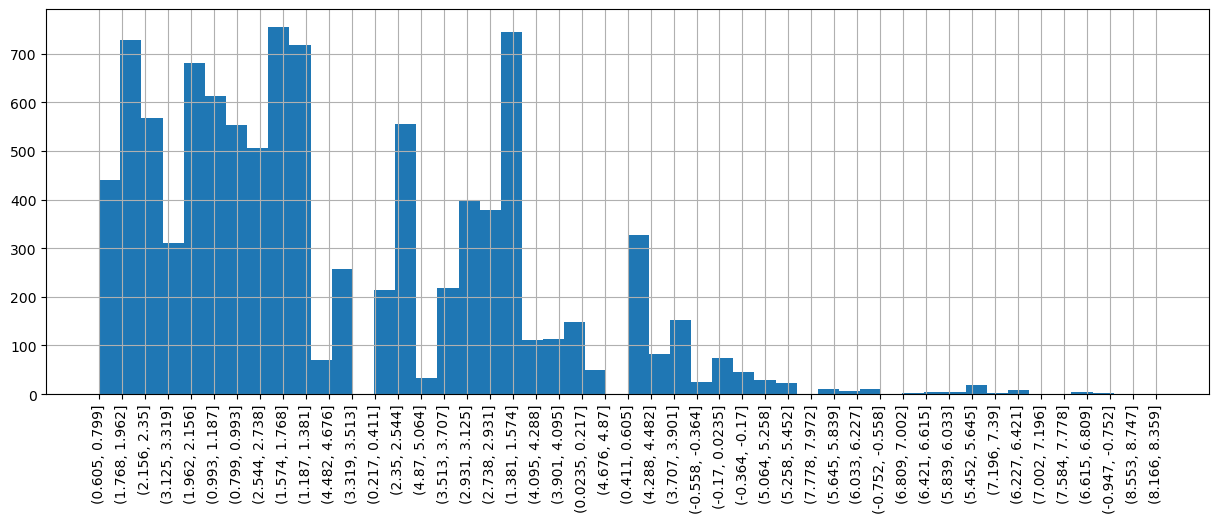

In [7]:
df['ancho_x'].astype('str').hist(figsize=(15,5),bins=50,xrot=90)

In [9]:
x=df.groupby('ancho_x', observed=False)['x'].mean()
y=df.groupby('ancho_x',  observed=False)['y'].mean()
x.isna().sum(),y.isna().sum()

(3, 3)

In [10]:
#x=x.dropna()
#y=y.dropna()
while(x.isna().sum()>0): # Parche
    nans_x=np.where(x.isna())
    for idx in nans_x:
        x.iloc[idx]=x.iloc[idx-1]
        y.iloc[idx]=y.iloc[idx-1]
x.isna().sum()

0

In [11]:
y.isna().sum()

0

In [12]:
#Regresión
lin_ancho_x=LinearRegression()
lin_ancho_x.fit(x.values.reshape(-1,1),y)
predict_ancho_x=lin_ancho_x.predict(df['x'].values.reshape(-1,1))

In [13]:
lin_SD=LinearRegression()
lin_SD.fit(df[['x']],df['y'])
predict_SD=lin_SD.predict(df[['x']])

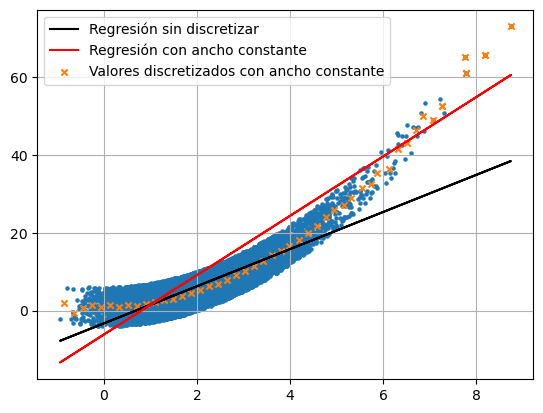

In [14]:
# Gráfico
plt.scatter(df.x,df.y,s=5)
plt.plot(df.x,predict_SD,'k',label='Regresión sin discretizar')
plt.plot(df.x,predict_ancho_x,'r',label='Regresión con ancho constante')
plt.scatter(x,y,marker='x',s=20,label='Valores discretizados con ancho constante')
plt.legend()
plt.grid()

In [15]:
# Discretización con frecuencia constante
# Usamos la misma cantidad de contenedores
bins

50

In [16]:
df.x.shape[0] # Cantidad de observaciones

10000

In [17]:
# Cada contenedor tendrá 200 observaciones
df.x.shape[0]/bins

200.0

In [18]:
pd.qcut?

Signature:
pd.qcut(
    x,
    q,
    labels=None,
    retbins: 'bool' = False,
    precision: 'int' = 3,
    duplicates: 'str' = 'raise',
)
Docstring:
Quantile-based discretization function.

Discretize variable into equal-sized buckets based on rank or based
on sample quantiles. For example 1000 values for 10 quantiles would
produce a Categorical object indicating quantile membership for each data point.

Parameters
----------
x : 1d ndarray or Series
q : int or list-like of float
    Number of quantiles. 10 for deciles, 4 for quartiles, etc. Alternately
    array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles.
labels : array or False, default None
    Used as labels for the resulting bins. Must be of the same length as
    the resulting bins. If False, return only integer indicators of the
    bins. If True, raises an error.
retbins : bool, optional
    Whether to return the (bins, labels) or not. Can be useful if bins
    is given as a scalar.
precision : int, optional
    

In [19]:
ancho

0.19385828896012444

In [20]:
# Discretización
df['freq_x'], intervalos = pd.qcut(df.x,bins, retbins=True)

In [21]:
df

,x,y,ancho_x,freq_x
0,0.764529,-2.877617,"(0.605, 0.799]","(0.685, 0.766]"
1,1.824207,0.032448,"(1.768, 1.962]","(1.794, 1.85]"
2,2.245600,5.832314,"(2.156, 2.35]","(2.198, 2.261]"
3,0.735367,0.147006,"(0.605, 0.799]","(0.685, 0.766]"
4,3.289547,15.751170,"(3.125, 3.319]","(3.19, 3.322]"
...,...,...,...,...
9995,2.837633,10.901060,"(2.738, 2.931]","(2.781, 2.882]"
9996,1.643641,2.722871,"(1.574, 1.768]","(1.597, 1.647]"
9997,0.908116,-2.678062,"(0.799, 0.993]","(0.848, 0.911]"
9998,1.894446,6.089054,"(1.768, 1.962]","(1.85, 1.908]"


In [22]:
df['freq_x'].value_counts()

freq_x
(-0.947, 0.102]    200
(2.615, 2.697]     200
(1.963, 2.026]     200
(2.026, 2.078]     200
(2.078, 2.133]     200
(2.133, 2.198]     200
(2.198, 2.261]     200
(2.261, 2.333]     200
(2.333, 2.402]     200
(2.402, 2.467]     200
(2.467, 2.543]     200
(2.543, 2.615]     200
(2.697, 2.781]     200
(0.102, 0.298]     200
(2.781, 2.882]     200
(2.882, 2.99]      200
(2.99, 3.087]      200
(3.087, 3.19]      200
(3.19, 3.322]      200
(3.322, 3.47]      200
(3.47, 3.646]      200
(3.646, 3.86]      200
(3.86, 4.188]      200
(4.188, 4.669]     200
(1.908, 1.963]     200
(1.85, 1.908]      200
(1.794, 1.85]      200
(1.751, 1.794]     200
(0.298, 0.463]     200
(0.463, 0.577]     200
(0.577, 0.685]     200
(0.685, 0.766]     200
(0.766, 0.848]     200
(0.848, 0.911]     200
(0.911, 0.978]     200
(0.978, 1.041]     200
(1.041, 1.103]     200
(1.103, 1.174]     200
(1.174, 1.228]     200
(1.228, 1.285]     200
(1.285, 1.332]     200
(1.332, 1.388]     200
(1.388, 1.442]     200
(1.4

In [23]:
xF = df.groupby('freq_x', observed=False)['x'].mean()
yF = df.groupby('freq_x', observed=False)['y'].mean()

In [24]:
xF.isna().sum(), yF.isna().sum()

(0, 0)

In [25]:
#Regresión
lin_freq_x=LinearRegression()
lin_freq_x.fit(xF.values.reshape(-1,1),yF)
predict_freq_x=lin_freq_x.predict(df[['x']].values)

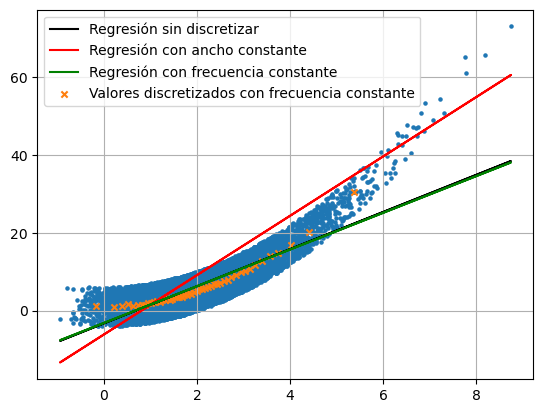

In [26]:
# Gráfico
plt.scatter(df.x,df.y,s=5)
plt.plot(df.x,predict_SD,'k',label='Regresión sin discretizar')
plt.plot(df.x,predict_ancho_x,'r',label='Regresión con ancho constante')
plt.plot(df.x,predict_freq_x,'g',label='Regresión con frecuencia constante')
plt.scatter(xF,yF,marker='x',s=20,label='Valores discretizados con frecuencia constante')
plt.legend()
plt.grid()

In [27]:
# Modelo con datos sin discretizar
lin_SD.coef_, lin_SD.intercept_

(array([4.76853382]), -3.2682763675638355)

In [28]:
# Modelo con datos discretizados por freq contante
lin_freq_x.coef_, lin_freq_x.intercept_

(array([4.71407497]), -3.1598871109529023)

# Modelos conseguidos
Modelo con datos sin discretizar
$$
y=?
$$
Modelo con datos discretizados con frecuencia constante
$$
y=?
$$

## Ejemplo 2

In [29]:
titanic_df = pd.read_csv("titanic.csv")

In [30]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

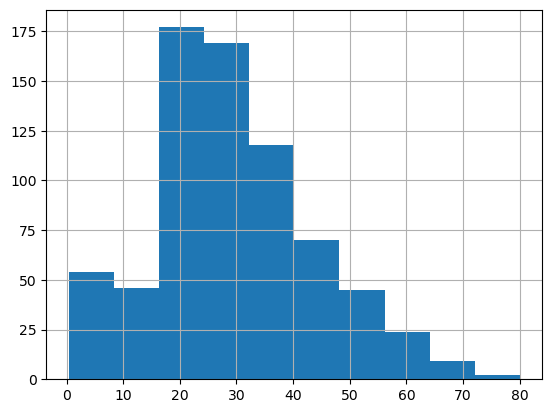

In [31]:
titanic_df['Age'].hist()

In [32]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [33]:
def cut_age(df, cut_values, label_names):
    df["Age_labels"] = pd.cut(df['Age'], bins=cut_values, labels=label_names)
    return df

In [34]:
cut_values = [0,3,12,19,35,60,80]
labels_names = ['infants', 'children', 'teenagers', 'young adults', 'middle adults', 'seniors']

In [35]:
cut_age(titanic_df, cut_values, labels_names)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_labels
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,middle adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,young adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,young adults
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,teenagers
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,young adults


In [36]:
import seaborn as sns

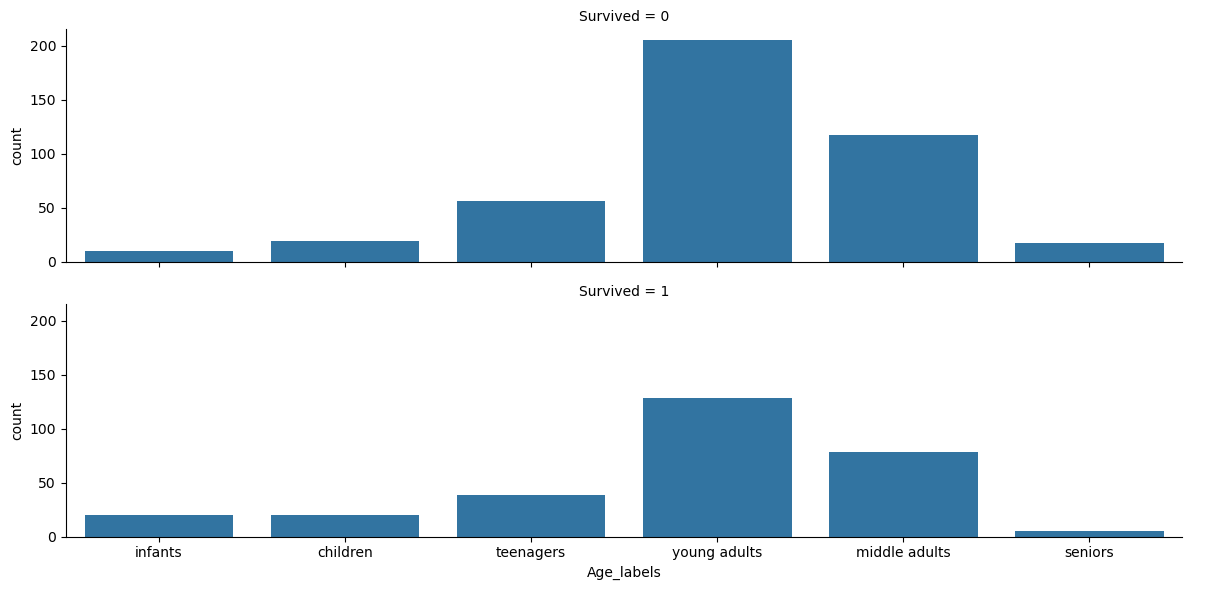

In [37]:
sns.catplot(x='Age_labels', row='Survived', kind="count", data=titanic_df, aspect=4, height=3)

In [38]:
def qcut_fare(df, cut_values, label_names):
    df["Fare_labels"] = pd.qcut(df['Fare'], cut_values, labels=label_names)
    return df
labels=['range1','range2','range3','range4']
titanic_df = qcut_fare(titanic_df, 4, labels)

In [39]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_labels,Fare_labels
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young adults,range1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,middle adults,range4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young adults,range2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young adults,range4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,young adults,range2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,young adults,range2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,teenagers,range3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,range3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,young adults,range3


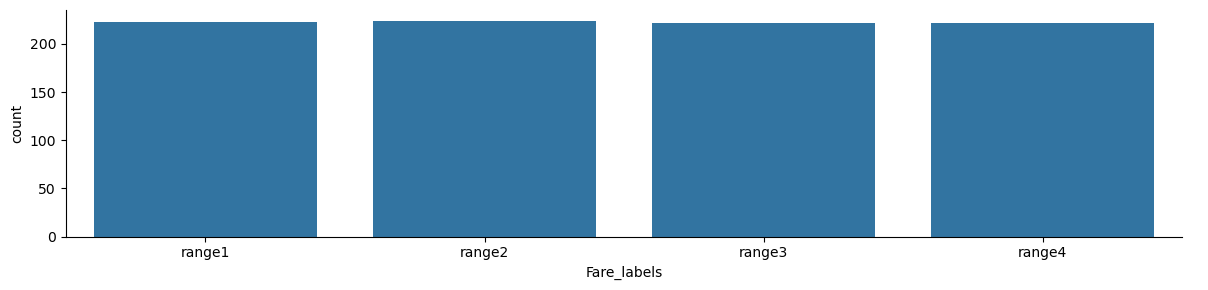

In [40]:
sns.catplot(x='Fare_labels',  kind="count", data=titanic_df, aspect=4, height=3)